In [143]:
# GlobalPowerPlantDatabase

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import cross_val_score,GridSearchCV
%matplotlib inline


import warnings
warnings.filterwarnings('ignore')


df=pd.read_csv(r'C:\ProgramData\database_IND.csv')
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN


In [3]:
df.shape

(907, 27)

In [ ]:
# Exploratory Data Analysis
# Important Observations :
# The dataset comprises of 907 observations of 27 columns.

In [4]:
# Exploratory Data Analysis

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   primary_fuel              907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        527 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    907 non-null    object 
 14  url       

In [ ]:
# 1)we can find multiple missing values in various features.need to check that
# 2)Maximum features are of float type and few are of object type

In [133]:
df.describe()

,capacity_mw,latitude,longitude,other_fuel3,commissioning_year,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,estimated_generation_gwh
count,907.000000,861.000000,861.000000,0.0,527.000000,0.0,519.0,0.0,398.000000,422.000000,434.000000,440.000000,448.000000,0.0,0.0
mean,326.223755,21.197918,77.464907,NaN,1997.091082,NaN,2019.0,NaN,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,NaN,NaN
std,590.085456,6.239612,4.939316,NaN,17.082868,NaN,0.0,NaN,4026.440035,4194.596959,4162.884308,4196.991169,4314.880456,NaN,NaN
min,0.000000,8.168900,68.644700,NaN,1927.000000,NaN,2019.0,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,16.725000,16.773900,74.256200,NaN,1988.000000,NaN,2019.0,NaN,223.557672,176.381063,188.285252,177.874930,193.378250,NaN,NaN
50%,59.200000,21.780000,76.719500,NaN,2001.000000,NaN,2019.0,NaN,801.123775,711.181225,737.205450,817.977250,751.644375,NaN,NaN
75%,385.250000,25.512400,79.440800,NaN,2012.000000,NaN,2019.0,NaN,3035.306250,3084.121250,3282.861313,3275.690475,3143.535900,NaN,NaN
max,4760.000000,34.649000,95.408000,NaN,2018.000000,NaN,2019.0,NaN,28127.000000,30539.000000,30015.000000,35116.000000,35136.000000,NaN,NaN


In [ ]:
# Clearly many null values could be seen in different features.
# We can neglect the features which are of less importance and have maximum null values in comparision to number of samples
# Clearly std in comparision to mean is greater in case of capacity_mw,generation_gwh_2014,generation_gwh_2015,
#generation_gwh_2016,which shows there are outliers in these features.need to check that

In [134]:
# checking for null values in dataset

df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

In [ ]:
# Clealry there are many null values in the dataset

In [144]:
# filling missing values

df['generation_gwh_2014'].fillna(df['generation_gwh_2014'].mean(), inplace=True)
df['generation_gwh_2015'].fillna(df['generation_gwh_2015'].mean(), inplace=True)
df['generation_gwh_2016'].fillna(df['generation_gwh_2016'].mean(), inplace=True)
df['generation_gwh_2017'].fillna(df['generation_gwh_2017'].mean(), inplace=True)
df['generation_gwh_2018'].fillna(df['generation_gwh_2018'].mean(), inplace=True)
df['geolocation_source'].fillna(df['geolocation_source'].mode()[0], inplace=True)
df['generation_data_source'].fillna(df['generation_data_source'].mode()[0], inplace=True)
df['year_of_capacity_data'].fillna(df['year_of_capacity_data'].mode()[0], inplace=True)


In [145]:
# Removing 'other_fuel1','other_fuel2','other_fuel3','url',commissioning_year','owner','wepp_id','year_of_capacity_data','generation_gwh_2013','generation_gwh_2019','source','url' from dataset

df.drop(['country','gppd_idnr','country_long','other_fuel1','other_fuel2','other_fuel3','commissioning_year','url','owner','wepp_id','generation_gwh_2013','generation_gwh_2019','generation_data_source','estimated_generation_gwh'],axis=1,inplace=True)

In [146]:
df.head()

,name,capacity_mw,latitude,longitude,primary_fuel,source,geolocation_source,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,ACME Solar Tower,2.5,28.1839,73.2407,Solar,National Renewable Energy Laboratory,National Renewable Energy Laboratory,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
1,ADITYA CEMENT WORKS,98.0,24.7663,74.6090,Coal,Ultratech Cement ltd,WRI,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
2,AES Saurashtra Windfarms,39.2,21.9038,69.3732,Wind,CDM,WRI,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
3,AGARTALA GT,135.0,23.8712,91.3602,Gas,Central Electricity Authority,WRI,2019.0,617.789264,843.747000,886.004428,663.774500,626.239128
4,AKALTARA TPP,1800.0,21.9603,82.4091,Coal,Central Electricity Authority,WRI,2019.0,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000


In [147]:
df.isnull().sum()

name                      0
capacity_mw               0
latitude                 46
longitude                46
primary_fuel              0
source                    0
geolocation_source        0
year_of_capacity_data     0
generation_gwh_2014       0
generation_gwh_2015       0
generation_gwh_2016       0
generation_gwh_2017       0
generation_gwh_2018       0
dtype: int64

In [148]:
df1=df.dropna(axis=0)

In [149]:
df1.isnull().sum()

name                     0
capacity_mw              0
latitude                 0
longitude                0
primary_fuel             0
source                   0
geolocation_source       0
year_of_capacity_data    0
generation_gwh_2014      0
generation_gwh_2015      0
generation_gwh_2016      0
generation_gwh_2017      0
generation_gwh_2018      0
dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

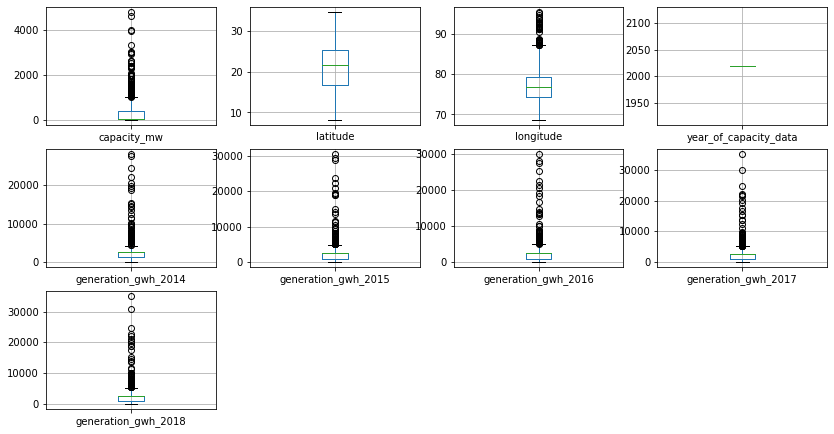

In [150]:
# Checking outliers in data


df1.plot(kind='box', subplots=True, layout=(4,4), figsize=(14,10), grid=True)
plt.show

In [151]:
# converting categorical features into ordinal

from sklearn.preprocessing import LabelEncoder

cat_col= ['name','primary_fuel','source','geolocation_source'] 
le= LabelEncoder()
for i in cat_col:   
    df1[i] = le.fit_transform(df1[i]) 

In [152]:
df1.head()

,name,capacity_mw,latitude,longitude,primary_fuel,source,geolocation_source,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,0,2.5,28.1839,73.2407,6,109,1,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
1,1,98.0,24.7663,74.6090,1,174,2,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
2,2,39.2,21.9038,69.3732,7,21,2,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
3,3,135.0,23.8712,91.3602,2,22,2,2019.0,617.789264,843.747000,886.004428,663.774500,626.239128
4,4,1800.0,21.9603,82.4091,1,22,2,2019.0,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000


In [158]:

X=df1.drop(['primary_fuel','capacity_mw'],axis=1)
y=df1.get(['primary_fuel','capacity_mw'])

In [159]:
# Checking skewness in features

X.skew().sort_values()

geolocation_source      -2.072165
latitude                -0.145866
name                     0.000000
year_of_capacity_data    0.000000
longitude                1.112646
source                   1.778807
generation_gwh_2018      4.843057
generation_gwh_2014      4.930254
generation_gwh_2016      4.965294
generation_gwh_2017      5.014455
generation_gwh_2015      5.253370
dtype: float64

In [160]:
# Removing skewness

from sklearn.preprocessing import power_transform
z = power_transform(X[0:])
data_new= pd.DataFrame(z,columns=X.columns)
X = data_new


In [161]:
# Checking skewness in features

X.skew().sort_values()

geolocation_source      -2.045610
name                    -0.288042
source                  -0.187908
latitude                -0.087776
year_of_capacity_data    0.000000
generation_gwh_2018      0.008027
longitude                0.017909
generation_gwh_2017      0.024552
generation_gwh_2016      0.040848
generation_gwh_2015      0.072906
generation_gwh_2014      0.117713
dtype: float64

In [163]:
# Scaling the dataset


from sklearn.preprocessing import MinMaxScaler
X=MinMaxScaler().fit_transform(X)

In [172]:
#Training model with DecisionTreeRegressor and finding the best state,r2_score

from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split

model_dt = DecisionTreeRegressor()

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state =12)
model_dt.fit(X_train, y_train)
y_pred_dt = model_dt.predict(X_test)
score=r2_score(y_test,y_pred_dt)
    
    
print('best r2 score : ',score)

best r2 score :  0.7173827008753206


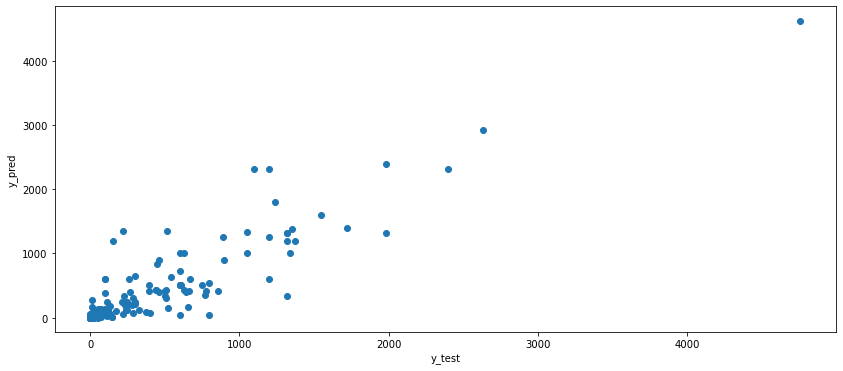

In [170]:
# # plotting original training data wth predicted values for DecisionTreeRegressor model

plt.figure(figsize=(14,6))
plt.scatter(x=y_test,y=y_pred_dt)
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.show()

In [175]:
#Training model with RandomForestRegressorr and finding the r2_score

from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split

model_dt = RandomForestRegressor()

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state =12)
model_rfr.fit(X_train, y_train)
y_pred_rfr = model_rfr.predict(X_test)
score=r2_score(y_test,y_pred_rfr)
    
    
print('best r2 score fo RandomForestRegressor : ',score)

best r2 score fo RandomForestRegressor :  0.8767811113973862


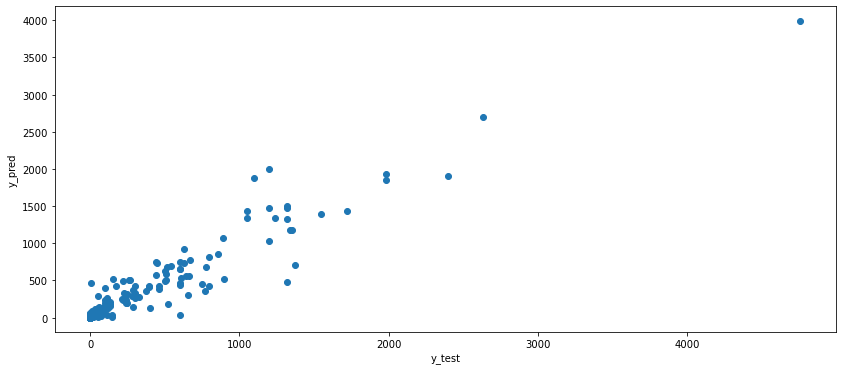

In [176]:
# # plotting original training data wth predicted values for RandomForestRegressor model

plt.figure(figsize=(14,6))
plt.scatter(x=y_test,y=y_pred_rfr)
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.show()

In [177]:
#Training model with LinearRegression and finding the r2_score

from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split

model_lr = LinearRegression()

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state =12)
model_lr.fit(X_train, y_train)
y_pred_lr = model_lr.predict(X_test)
score=r2_score(y_test,y_pred_lr)
    
    
print('best r2 score for LinearRegression : ',score)

best r2 score for LinearRegression :  0.36735779714804934


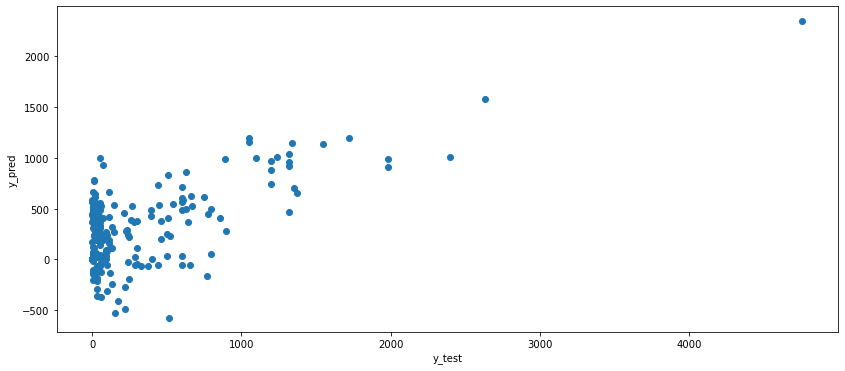

In [178]:
# # plotting original training data wth predicted values for LinearRegression model

plt.figure(figsize=(14,6))
plt.scatter(x=y_test,y=y_pred_lr)
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.show()

In [183]:
#Training model with KNeighborsRegressor and finding the r2_score

from sklearn.metrics import mean_squared_error,r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split

model_knr = KNeighborsRegressor()

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state =12)
model_knr.fit(X_train, y_train)
y_pred_knr = model_knr.predict(X_test)
score=r2_score(y_test,y_pred_lr)
    
    
print('best r2 score for KNeighborsRegressor : ',score)

best r2 score for KNeighborsRegressor :  0.36735779714804934


In [ ]:
# Clearly RandomForestRegressor model looks good enough to predict primary_fuel and capacity_mw

In [195]:
# HyperParameterTuning with  RandomForestRegressor

from sklearn.model_selection import GridSearchCV
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state =12)

estimator = RandomForestRegressor()
param_grid = { 
            "n_estimators"      : [10,20,30],
            "max_features"      : ["auto", "sqrt", "log2"],
            "min_samples_split" : [2,4,8],
            "bootstrap": [True, False],
            }

In [196]:
grid = GridSearchCV(estimator, param_grid, n_jobs=-1, cv=5)

grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_split': [2, 4, 8],
                         'n_estimators': [10, 20, 30]})

In [197]:
grid.best_score_

0.8359874815209117

In [198]:
grid.best_params_

{'bootstrap': False,
 'max_features': 'log2',
 'min_samples_split': 4,
 'n_estimators': 30}

In [199]:
grid.score(X_test,y_test)

0.8826410584298404

In [201]:
rfr = RandomForestRegressor()
rfr.fit(X_train,y_train)
y_pred_rfr=rfr.predict(X_test)
y_pred_rfr[0:20]

array([[2.1800000e+00, 4.3669376e+02],
       [6.3600000e+00, 3.1902000e+01],
       [1.3500000e+00, 1.4803000e+03],
       [2.8600000e+00, 1.4725180e+02],
       [3.2200000e+00, 4.3430000e+01],
       [1.6500000e+00, 5.8728700e+02],
       [3.5500000e+00, 1.7515000e+01],
       [2.0000000e+00, 6.3583294e+02],
       [1.6800000e+00, 7.5902400e+02],
       [6.9400000e+00, 3.5759000e+01],
       [5.6400000e+00, 2.1326000e+01],
       [1.6200000e+00, 1.8272000e+03],
       [5.9100000e+00, 7.1562000e+01],
       [5.9300000e+00, 1.0326000e+01],
       [1.1700000e+00, 1.3541000e+03],
       [2.8400000e+00, 7.0262300e+01],
       [2.9000000e+00, 1.8528430e+02],
       [2.7400000e+00, 4.4064730e+02],
       [6.4300000e+00, 3.2416200e+02],
       [2.3300000e+00, 4.7064670e+02]])

In [202]:
y_test[0:20]

,primary_fuel,capacity_mw
84,1,500.0
31,7,13.2
623,1,1720.0
81,3,34.0
601,3,59.2
569,5,175.0
584,3,10.0
720,1,500.0
274,3,780.0
485,7,20.0


In [203]:
score=r2_score(y_test,y_pred_rfr)
score

0.8849172025320616

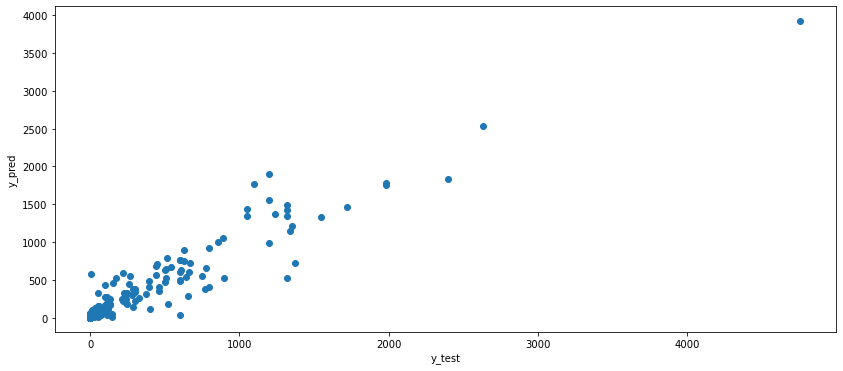

In [194]:
# # plotting original training data wth predicted values for RandomForestRegressor model after HyperPparameterTuning

plt.figure(figsize=(14,6))
plt.scatter(x=y_test,y=y_pred_rfr)
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.show()

In [ ]:
# plotted the scatter plot graph and we can see that the actual value and predicted values are very close to each other, 
# so the line is best fit line.

In [204]:
# Exporting the model through pickle

import pickle
filename='GlobalPowerPlant.pkl'
pickle.dump(rfr,open(filename,'wb'))